# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$\nabla_w Q(w) = \frac{2}{l}X^T(Xw - y)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [80]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
x_train = (x.T + np.array(list(range(x.shape[0])))).T
y_train = y + np.array(list(range(x.shape[0])))

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:
https://contest.yandex.ru/contest/29933/run-report/55412845/

* **StochasticDescent**:
https://contest.yandex.ru/contest/29933/run-report/55397858/

* **MomentumDescent**:
https://contest.yandex.ru/contest/29933/run-report/55398903/

* **Adam**:
https://contest.yandex.ru/contest/29933/run-report/55409941/

* **LinearRegression**:
https://contest.yandex.ru/contest/29933/run-report/55414657/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [66]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

import warnings
warnings.filterwarnings('ignore')

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


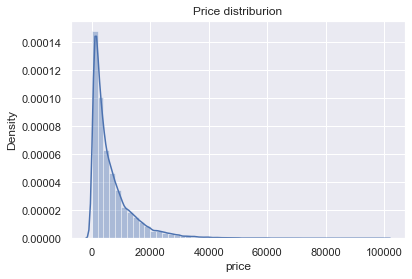

In [11]:
plt.title('Price distriburion')
sns.distplot(data['price'])
plt.show()

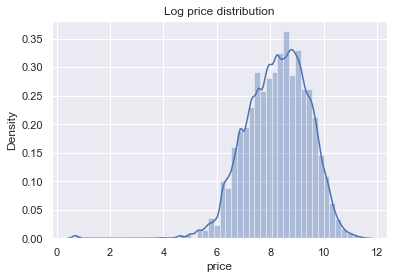

In [12]:
plt.title('Log price distribution')
sns.distplot(np.log1p(data['price']))
plt.show()

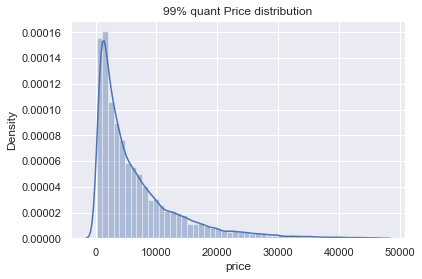

In [13]:
quant1 = np.quantile(data['price'], 0.005)
quant2 = np.quantile(data['price'], 0.995)
mask = (data['price'] > quant1) & (data['price'] < quant2)
plt.title('99% quant Price distribution')
sns.distplot(data['price'][mask])
plt.show()

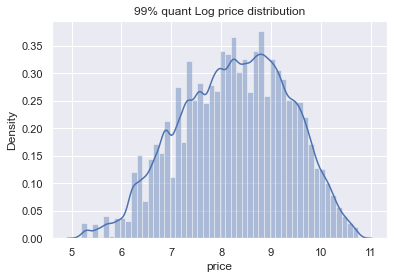

In [14]:
plt.title('99% quant Log price distribution')
sns.distplot(np.log1p(data['price'][mask]))
plt.show()

In [15]:
data = data[mask]
data['log_price'] = np.log1p(data['price'])

Кажется, что лучше опять же рассматривать логарифм целевой переменной, т.к. тогда получаем нормальное распределение, также видим, что у нас есть аномально маленькие и аномально большие цены.

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238764 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              238764 non-null  object 
 1   model              238764 non-null  object 
 2   vehicleType        238764 non-null  object 
 3   gearbox            238764 non-null  object 
 4   fuelType           238764 non-null  object 
 5   notRepairedDamage  238764 non-null  object 
 6   powerPS            238764 non-null  int64  
 7   kilometer          238764 non-null  int64  
 8   autoAgeMonths      238764 non-null  int64  
 9   price              238764 non-null  int64  
 10  log_price          238764 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ MB


In [134]:
len(data['brand'].value_counts())

38

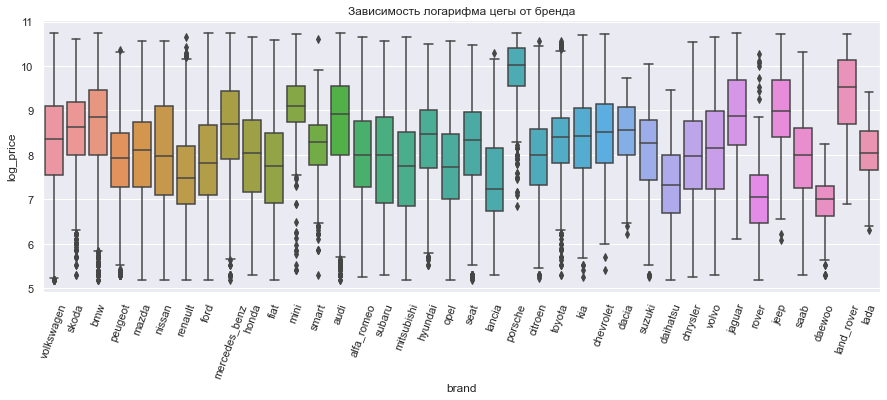

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation=70)
plt.title('Зависимость логарифма цегы от бренда')
sns.boxplot(x='brand', y='log_price', data=data, ax=ax)
plt.show()

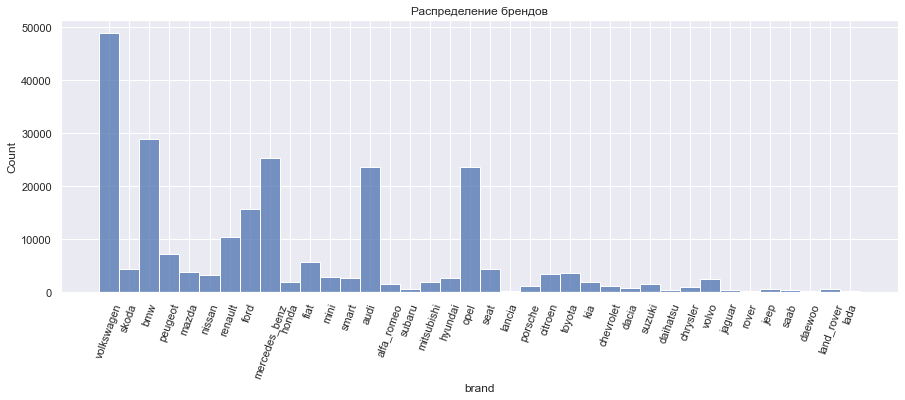

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation=70)
plt.title('Распределение брендов')
sns.histplot(data['brand'], ax=ax)
plt.show()

In [137]:
len(data['model'].value_counts())

248

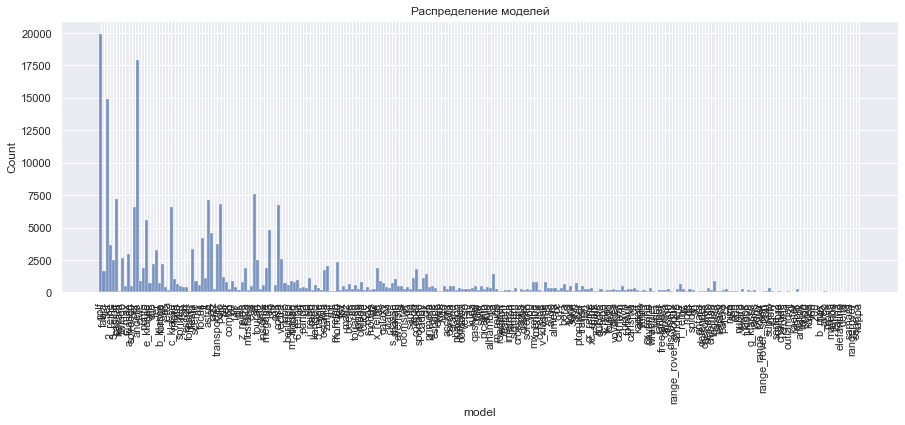

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title('Распределение моделей')
sns.histplot(data['model'], ax=ax)
plt.show()

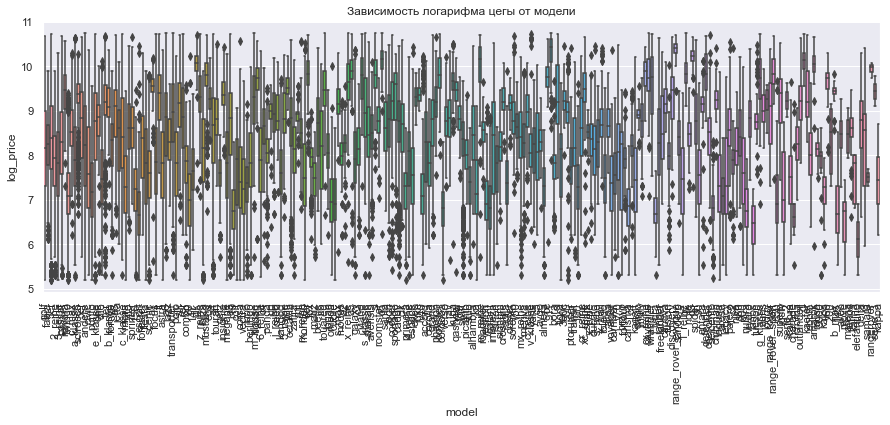

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xticks(rotation=90)
plt.title('Зависимость логарифма цегы от модели')
sns.boxplot(x='model', y='log_price', data=data, ax=ax)
plt.show()

Выглядит страшно, но видно, что зависимости есть.

In [118]:
data['vehicleType'].value_counts()

limousine     72074
kombi         50549
kleinwagen    49342
bus           23600
cabrio        17248
coupe         13236
suv           11286
andere         1429
Name: vehicleType, dtype: int64

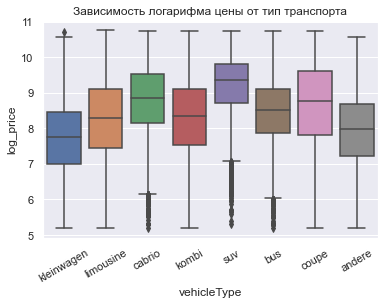

In [24]:
plt.title('Зависимость логарифма цены от тип транспорта')
plt.xticks(rotation=30)
sns.boxplot(x='vehicleType', y='log_price', data=data)
plt.show()

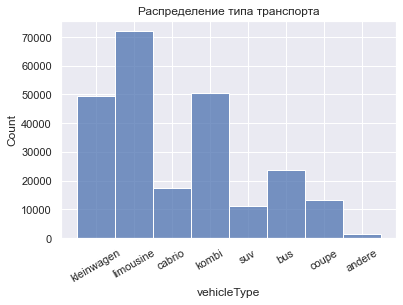

In [25]:
plt.title('Распределение типа транспорта')
plt.xticks(rotation=30)
sns.histplot(data['vehicleType'])
plt.show()

In [120]:
data['gearbox'].value_counts()

manuell      182152
automatik     56612
Name: gearbox, dtype: int64

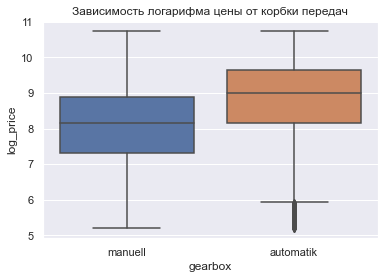

In [27]:
plt.title('Зависимость логарифма цены от корбки передач')
sns.boxplot(x='gearbox', y='log_price', data=data)
plt.show()

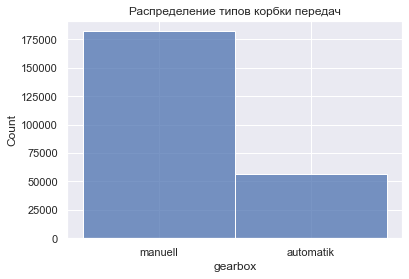

In [28]:
plt.title('Распределение типов корбки передач')
sns.histplot(data['gearbox'])
plt.show()

In [126]:
data['fuelType'].value_counts()

benzin     151710
diesel      82692
lpg          3682
cng           428
hybrid        192
andere         31
elektro        29
Name: fuelType, dtype: int64

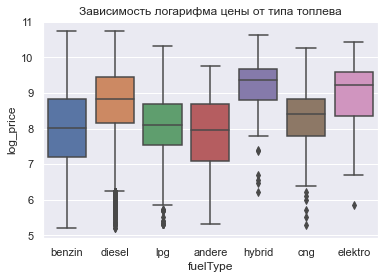

In [29]:
plt.title('Зависимость логарифма цены от типа топлева')
sns.boxplot(x='fuelType', y='log_price', data=data)
plt.show()

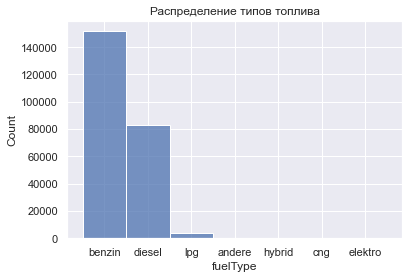

In [30]:
plt.title('Распределение типов топлива')
sns.histplot(data['fuelType'])
plt.show()

In [128]:
data['notRepairedDamage'].value_counts()

nein    215912
ja       22852
Name: notRepairedDamage, dtype: int64

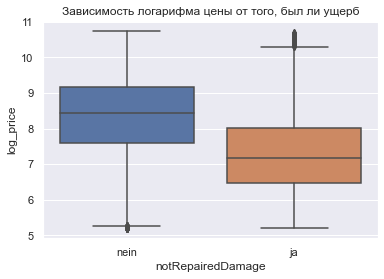

In [31]:
plt.title('Зависимость логарифма цены от того, был ли поломки')
sns.boxplot(x='notRepairedDamage', y='log_price', data=data)
plt.show()

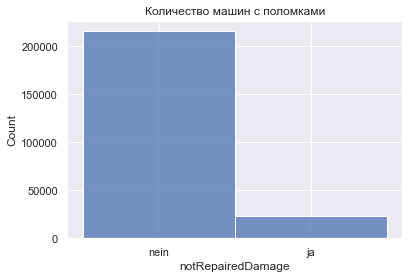

In [33]:
plt.title('Количество машин с поломками')
sns.histplot(data['notRepairedDamage'])
plt.show()

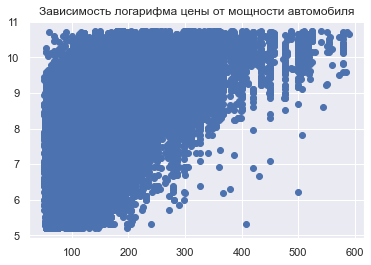

In [35]:
plt.title('Зависимость логарифма цены от мощности автомобиля')
plt.plot(data['powerPS'], data['log_price'], 'o')
plt.show()

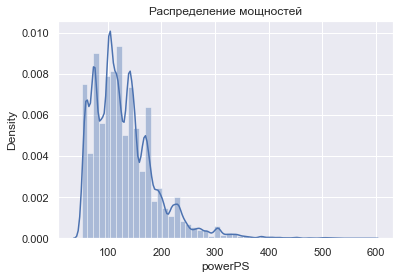

In [36]:
plt.title('Распределение мощностей')
sns.distplot(data['powerPS'])
plt.show()

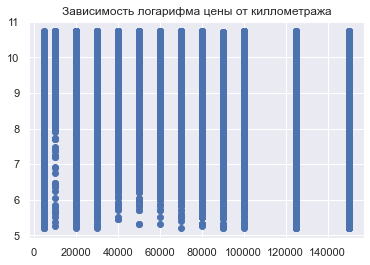

In [37]:
plt.title('Зависимость логарифма цены от киллометража')
plt.plot(data['kilometer'], data['log_price'], 'o')
plt.show()

Кажется, что признак не особо разделяет целевую переменную, но давайте построим боксплот.

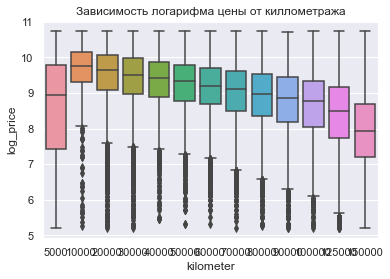

In [38]:
plt.title('Зависимость логарифма цены от киллометража')
sns.boxplot(x='kilometer', y='log_price', data=data)
plt.show()

Всё таки разделяет, всё хорошо

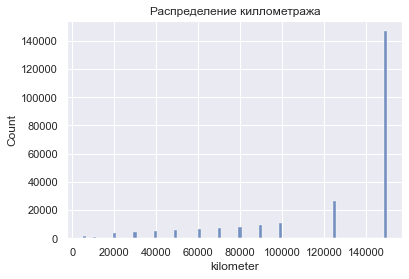

In [39]:
plt.title('Распределение киллометража')
sns.histplot(data['kilometer'])
plt.show()

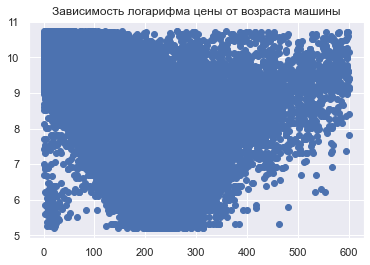

In [41]:
plt.title('Зависимость логарифма цены от возраста машины')
plt.plot(data['autoAgeMonths'], data['log_price'], 'o')
plt.show()

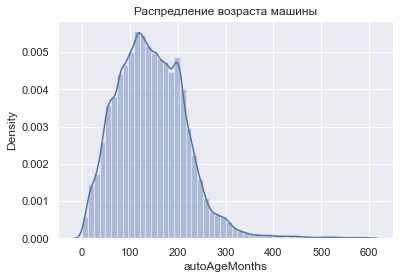

In [42]:
plt.title('Распредление возраста машины')
sns.distplot(data['autoAgeMonths'])
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238764 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              238764 non-null  object 
 1   model              238764 non-null  object 
 2   vehicleType        238764 non-null  object 
 3   gearbox            238764 non-null  int32  
 4   fuelType           238764 non-null  object 
 5   notRepairedDamage  238764 non-null  int32  
 6   powerPS            238764 non-null  int64  
 7   kilometer          238764 non-null  int64  
 8   autoAgeMonths      238764 non-null  int64  
 9   price              238764 non-null  int64  
 10  log_price          238764 non-null  float64
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 20.0+ MB


In [123]:
data = pd.read_csv('autos.csv')
data['log_price'] = np.log1p(data['price'])
data['notRepairedDamage'] = np.where(data['notRepairedDamage'] == 'ja', 1, 0)
data['gearbox'] = np.where(data['gearbox'] == 'manuell', 1, 0)

In [124]:
quant1 = np.quantile(data['price'], 0.005)
quant2 = np.quantile(data['price'], 0.995)
mask = (data['price'] > quant1) & (data['price'] < quant2)
data = data[mask]
data['log_price'] = np.log1p(data['price'])

Кажется, что некоторые очень старые машины, могу продаваться за большие деньги (из за риритетности), а некоторые нет, это добавляет нам много шуму, по хорошему нужно выявлять раритетные машины, но мы прост выкинем слишком старые из нашей выборки. 

In [125]:
quant = np.quantile(data['autoAgeMonths'], 0.99)
mask = data['autoAgeMonths'] < quant
data = data[mask]

In [126]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['notRepairedDamage', 'gearbox']


In [127]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_tmp, y_train, y_tmp = train_test_split(x, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

Vanila

In [51]:
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

In [149]:
loses1 = []

In [131]:
def lambda_search(grad_type, lambdas=np.logspace(-5, 0, 10)):
    scores = []
    for lambd in tqdm(lambdas):
        descent_config = {
            'descent_name': grad_type,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_' : lambd
            }
        }

        model = LinearRegression(descent_config)
        model.fit(X_train, np.array(y_train))

        pred = model.predict(X_val)
        score = mean_squared_error(pred, y_val)
        scores.append(score)
    best_lambda = lambdas[np.argmin(scores)]
    print(f'best val MSE score : {min(scores)}, best lambda: {best_lambda}')

    descent_config = {
            'descent_name': grad_type,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_' : best_lambda
            }
        }
    model = LinearRegression(descent_config)
    model.fit(X_train, np.array(y_train))

    pred = model.predict(X_train)
    score = r2_score(pred, y_train)
    print(f'train score R_2: {score}')

    pred = model.predict(X_test)
    score = r2_score(pred, y_test)
    print(f'test score R_2: {score}')
    print(f'Итераций до сходимости: {len(model.loss_history) - 1}')
    return model.loss_history

In [150]:
loses1.append(lambda_search('full'))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.40it/s]


best val MSE score : 0.2978768957810398, best lambda: 1.0
train score R_2: 0.7138025160350435
test score R_2: 0.7190287124419121
Итераций до сходимости: 62


In [151]:
loses1.append(lambda_search('stochastic'))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.16it/s]


best val MSE score : 0.46771285127423556, best lambda: 1.0
train score R_2: 0.5567647099708621
test score R_2: 0.5570106222284539
Итераций до сходимости: 300


In [152]:
loses1.append(lambda_search('momentum'))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.36it/s]


best val MSE score : 0.20808721182022857, best lambda: 1.0
train score R_2: 0.7892140151559175
test score R_2: 0.7915430882978112
Итераций до сходимости: 110


In [153]:
loses1.append(lambda_search('adam'))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:16<00:00,  1.67s/it]


best val MSE score : 0.19200201544750697, best lambda: 1.0
train score R_2: 0.8087649791691158
test score R_2: 0.8115955181391922
Итераций до сходимости: 192


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

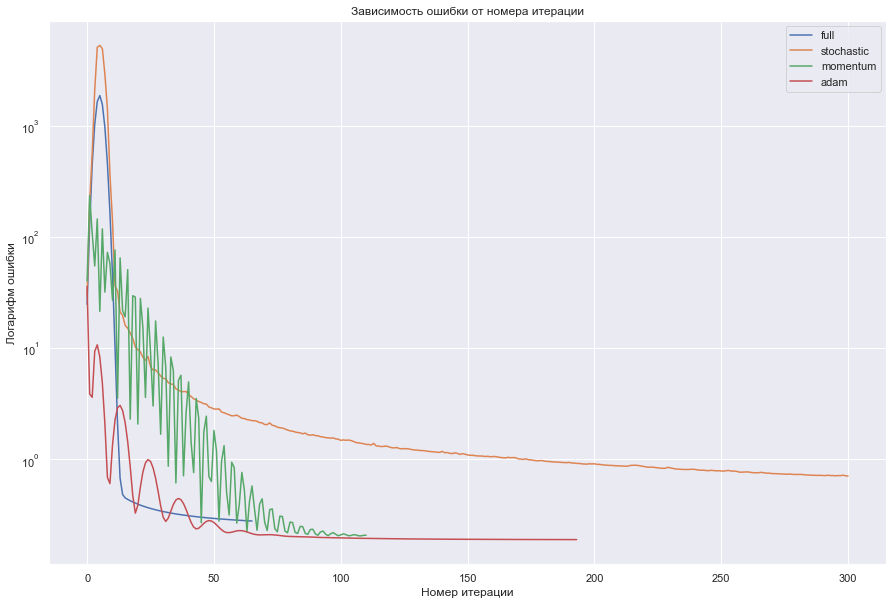

In [136]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Зависимость ошибки от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм ошибки')
plt.yscale('log')
for loss, method in zip(loses1, ['full', 'stochastic', 'momentum', 'adam']):
    ax.plot(range(len(loss)), loss, label=method)
plt.legend()
plt.show()

Видим, что быстрее всего сходится full GD, причём он сначала сильно растёт (вероятно, из за большой длины шага в начале), а потом начинает сходится. SGD же сходится хуже всех и дольше всех, вероятно, из за слишком маленького размера батча мы не можем попасть в минимум.Моментум работает в 2 раза быстрее SGD, и показывет очень хорошую точность, в начале его сильно колбасит, но при этом есть тренд на снижение. Адам же показывает себя лучше всех по точности, и сходится к ней довольно быстро (хотя и критерий останова достигается только ближе к 200 итерации).

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [137]:
import time

In [138]:
batch_sizes = np.arange(5, 500, 10)
times = [0] * len(batch_sizes)
iters = [0] * len(batch_sizes)
ind = 0
for batch in tqdm(batch_sizes):
    for _ in range(10):
        descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_' : 0.601603486985081,
            'batch_size' : batch
            }
        }

        model = LinearRegression(descent_config)
        start_time = time.time()
        model.fit(X_train, np.array(y_train))
        diff = time.time() - start_time

        times[ind] +=diff
        iters[ind] += len(model.loss_history) - 1
    times[ind] /= 10
    iters[ind] /= 10
    ind += 1

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:15<00:00,  5.11s/it]


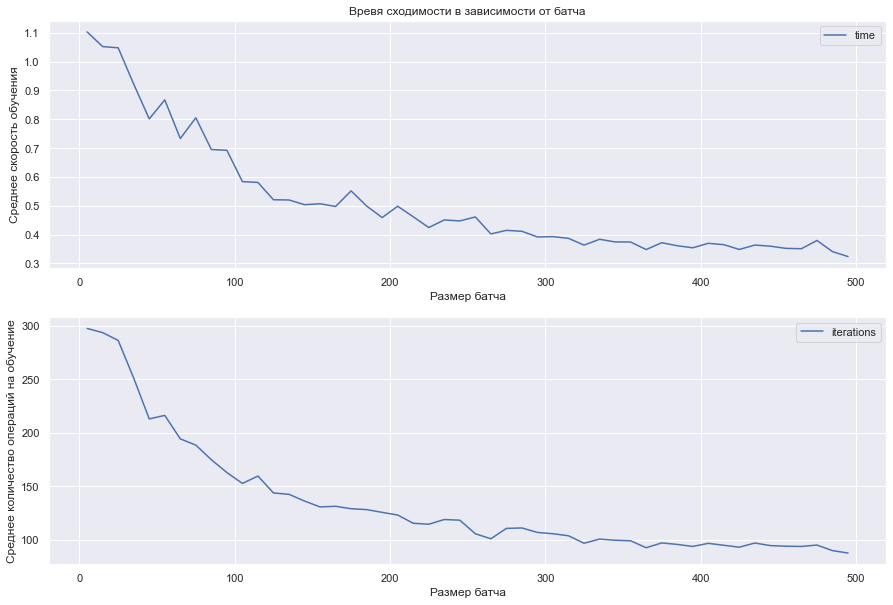

In [139]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.set_title('Вревя сходимости в зависимости от батча')
ax1.set_xlabel('Размер батча')
ax1.set_ylabel('Среднее скорость обучения')
ax1.plot(batch_sizes, times, label='time')
ax1.legend()
ax2.set_xlabel('Размер батча')
ax2.set_ylabel('Среднее количество операций на обучение')
ax2.plot(batch_sizes, iters, label='iterations')
ax2.legend()
plt.show()

Кажется, что среднее время обучения и кол-во итераций очень коррлируют, причём чем больше размер батча, тем быстрее наступает сходимость.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/55484790/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

In [141]:
def best_alpha_mu(grad_type, lambdas=np.logspace(-5, 0, 10), mus=np.logspace(-5, 2, 10)):
    scores = []
    for lambd in tqdm(lambdas):
        for mu in mus:
            descent_config = {
                'descent_name': grad_type,
                'regularized' : True,
                'kwargs': {
                    'dimension': X_train.shape[1],
                    'lambda_' : lambd,
                    'mu' : mu
                }
            }

            model = LinearRegression(descent_config)
            model.fit(X_train, np.array(y_train))
            pred = model.predict(X_val)
            score = r2_score(pred, y_val)
            scores.append(score)
    best_lambda = lambdas[np.argmax(scores) // len(lambdas)]
    best_mu = mus[np.argmax(scores) % len(mus)]
    print(f'best val score : {max(scores)}, best lambda: {best_lambda}, best mu: {best_mu}')

    descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_' : best_lambda
            }
        }
    model = LinearRegression(descent_config)
    model.fit(X_train, np.array(y_train))

    pred = model.predict(X_train)
    score = r2_score(pred, y_train)
    print(f'train score: {score}')

    loses.append(model.loss_history)

    pred = model.predict(X_test)
    score = r2_score(pred, y_test)
    print(f'test score: {score}')
    print(f'Итераций до сходимости: {len(model.loss_history) - 1}')
    return model.loss_history

In [142]:
full_lose = best_alpha_mu('full')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:19<00:00,  7.98s/it]


best val score : 0.7454136040108124, best lambda: 1.0, best mu: 100.0
train score: 0.6115006596307955
test score: 0.6129121116258217
Итераций до сходимости: 300


In [143]:
stoch_loss = best_alpha_mu('stochastic')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.14s/it]


best val score : 0.762254838021128, best lambda: 1.0, best mu: 100.0
train score: 0.6208530544181525
test score: 0.6233269006195008
Итераций до сходимости: 300


In [144]:
moment_loss = best_alpha_mu('momentum')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:54<00:00, 11.40s/it]


best val score : 0.7992646842260993, best lambda: 1.0, best mu: 100.0
train score: 0.602158513880755
test score: 0.5939691718883284
Итераций до сходимости: 300


In [145]:
adam_loss = best_alpha_mu('adam')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:25<00:00, 14.55s/it]


best val score : 0.8091518200228511, best lambda: 1.0, best mu: 1e-05
train score: 0.6753997471623164
test score: 0.676865130064342
Итераций до сходимости: 300


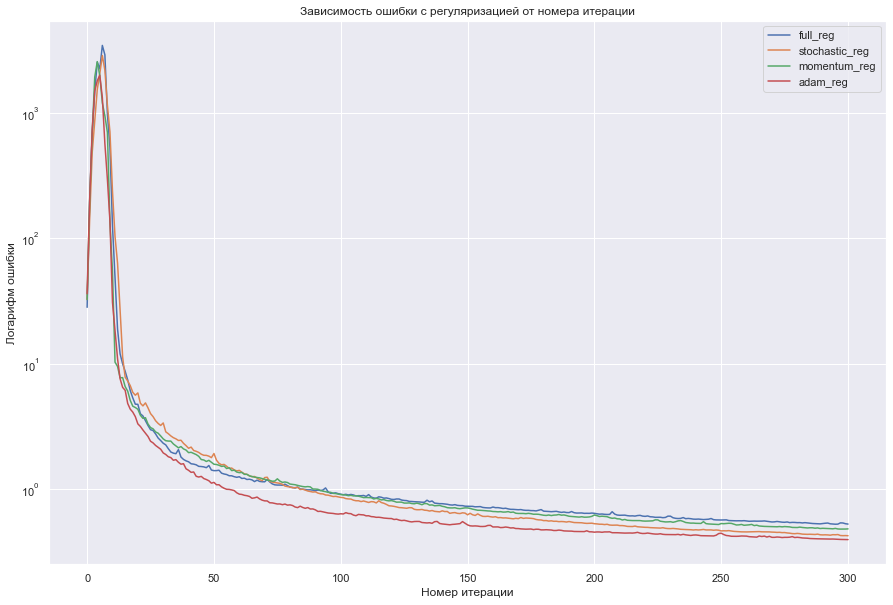

In [146]:
fig, ax = plt.subplots(figsize=(15,10))
loses = np.array([full_lose, stoch_loss, moment_loss, adam_loss])
plt.title('Зависимость ошибки с регуляризацией от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('Логарифм ошибки')
plt.yscale('log')
for loss, method in zip(loses, ['full_reg', 'stochastic_reg', 'momentum_reg', 'adam_reg']):
    ax.plot(range(len(loss)), loss, label=method)
plt.legend()

In [ ]:
'full', 'stochastic', 'momentum', 'adam'

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

**full loss:** 
reg: 0.6129121116258217 no_reg: 0.7255556488779059

**full iter:** 
reg: 300 no_reg: 65

**stochastic loss:**
reg: 0.6233269006195008 no_reg: 0.5364031507892106

**stochastic iter:**
reg: 300 no_reg: 300

**momentum loss:**
reg: 0.5939691718883284 no_reg: 0.7908060118133593

**momentum iter:**
reg: 300 no_reg: 110

**adam loss:**
reg: 0.676865130064342 no_reg: 0.8114234487112266

**adam iter:**
reg: 300 no_reg: 193

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

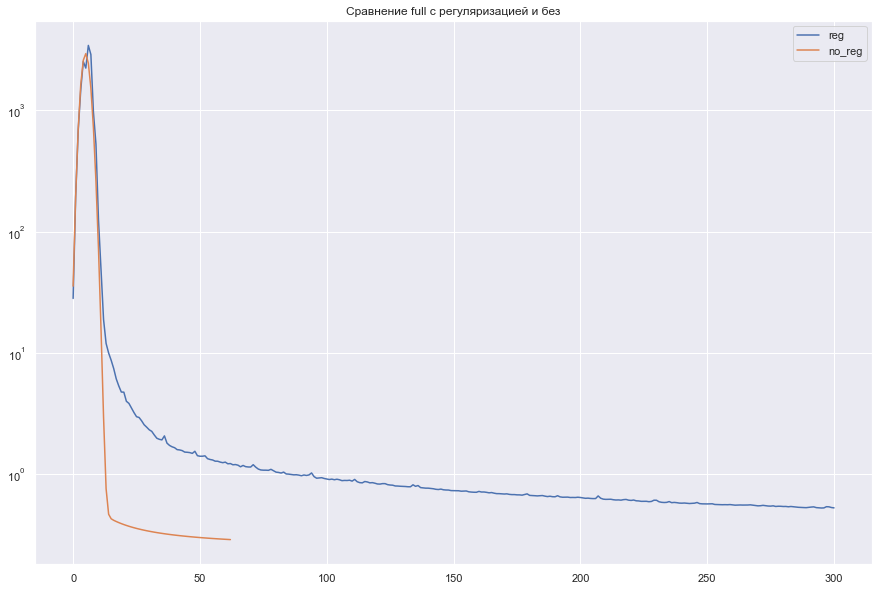

In [157]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Сравнение full с регуляризацией и без")
ax.plot(range(len(loses[0])), loses[0], label='reg')
ax.plot(range(len(loses1[0])), loses1[0], label='no_reg')
plt.legend()
plt.yscale('log')
plt.show()

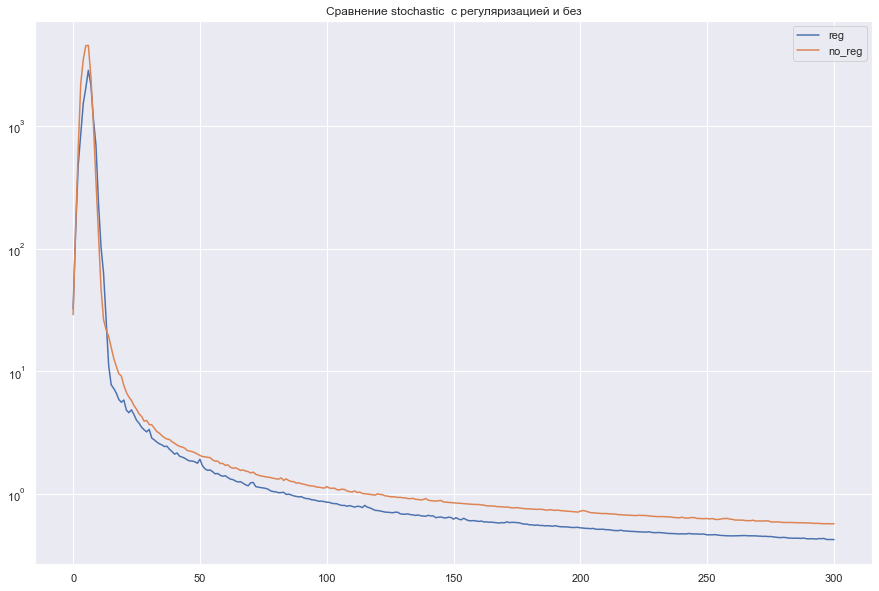

In [158]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Сравнение stochastic  с регуляризацией и без")
ax.plot(range(len(loses[1])), loses[1], label='reg')
ax.plot(range(len(loses1[1])), loses1[1], label='no_reg')
plt.legend()
plt.yscale('log')
plt.show()

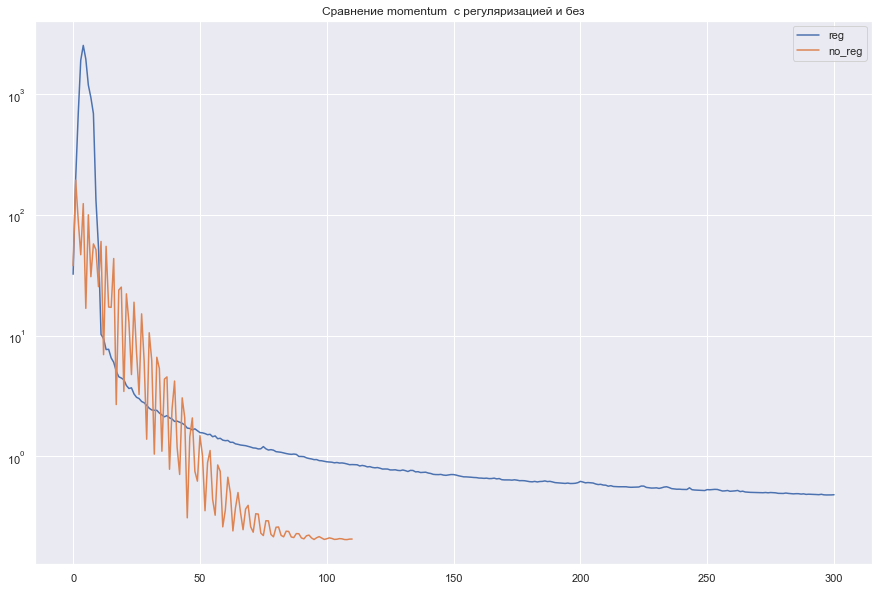

In [159]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Сравнение momentum  с регуляризацией и без")
ax.plot(range(len(loses[2])), loses[2], label='reg')
ax.plot(range(len(loses1[2])), loses1[2], label='no_reg')
plt.legend()
plt.yscale('log')
plt.show()

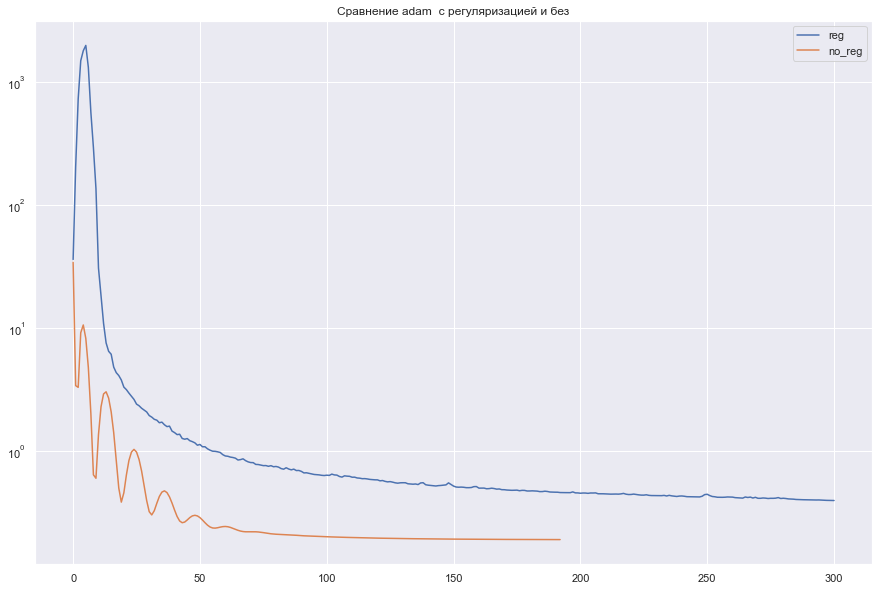

In [160]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title("Сравнение adam  с регуляризацией и без")
ax.plot(range(len(loses[3])), loses[3], label='reg')
ax.plot(range(len(loses1[3])), loses1[3], label='no_reg')
plt.legend()
plt.yscale('log')
plt.show()

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

Как видим, качество сильно падает, но сходимость с регуляризацией становится сильно плавнее. Это логично, потому что мы силнее штрафуем модель за большие веса, из за этого делаем более медленные шаги в сторону антиградиента, и не переступаем минимум.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$\frac{\partial L}{\partial w} = \frac{2}{e^{x_jw - y_j} + e^{-(x_jw - y_j)}}\frac{\partial}{\partial w}(\frac{e^{x_jw - y_j} + e^{-(x_jw - y_j)}}{2}) = \frac{x_j^T(e^{x_jw - y_j} - e^{-(x_jw - y_j)})}{e^{x_jw - y_j} + e^{-(x_jw - y_j)}} = x_j^T\tanh(x_jw - y_j)$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [4]:
from descents import LossFunction

In [34]:
def lambda_search_lc(grad_type, lambdas=np.logspace(-5, 0, 10)):
    scores = []
    scores_train = []
    for lambd in tqdm(lambdas):
        descent_config = {
            'descent_name': grad_type,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_' : lambd,
                'loss_function' : LossFunction.LogCosh
            }
        }

        model = LinearRegression(descent_config)
        model.fit(X_train, np.array(y_train))

        pred = model.predict(X_train)
        score = r2_score(pred, y_train)
        scores_train.append(score)

        pred = model.predict(X_val)
        score = r2_score(pred, y_val)
        scores.append(score)
    best_lambda = lambdas[np.argmax(scores)]
    print(f'best val score : {max(scores)}, best lambda: {best_lambda}')

    descent_config = {
            'descent_name': grad_type,
            'kwargs': {
                'dimension': X_train.shape[1],
                'lambda_' : best_lambda
            }
        }
    model = LinearRegression(descent_config)
    model.fit(X_train, np.array(y_train))

    pred = model.predict(X_train)
    score = r2_score(pred, y_train)
    print(f'train score: {score}')

    pred = model.predict(X_test)
    score = r2_score(pred, y_test)
    print(f'test score: {score}')
    print(f'Итераций до сходимости: {len(model.loss_history) - 1}')
    return model.loss_history

In [37]:
full_score = lambda_search_lc('full')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.47it/s]


best val score : 0.5882730011023042, best lambda: 1.0
train score: 0.7156803703489738
test score: 0.7048109646863245
Итераций до сходимости: 66


In [38]:
stoch_score = lambda_search_lc('stochastic')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.62it/s]


best val score : 0.6160607046946129, best lambda: 1.0
train score: 0.6588395999860925
test score: 0.6521462730058767
Итераций до сходимости: 300


In [39]:
moment_score = lambda_search_lc('momentum')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.06it/s]


best val score : 0.76918151349723, best lambda: 1.0
train score: 0.7970802912606354
test score: 0.7895870771159339
Итераций до сходимости: 115


In [40]:
adam_score = lambda_search_lc('adam')

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:12<00:00,  1.22s/it]


best val score : 0.806169689297195, best lambda: 1.0
train score: 0.81045855768261
test score: 0.8030788551454955
Итераций до сходимости: 187


**full loss:** 
log_cosh: 0.7048109646863245 MSE: 0.7255556488779059

**full iter:** 
log_cosh: 66 MSE: 65

**stochastic loss:**
log_cosh: 0.6521462730058767 MSE: 0.5364031507892106

**stochastic iter:**
log_cosh: 300 MSE: 300

**momentum loss:**
log_cosh: 0.7895870771159339 MSE: 0.7908060118133593

**momentum iter:**
log_cosh: 115 MSE: 110

**adam loss:**
log_cosh: 0.8030788551454955 MSE: 0.8114234487112266

**adam iter:**
log_cosh: 187 MSE: 193